# ST1516 DevOps and Automation for AI

### Lim Sheng Wei
### p23091233
### DAAA/2B/02

## Deployed on: 

https://ca2-daaa2b02-2309123-limshengwei.onrender.com/v1/models/saved_cgan

## Saving the Deep Learning Model in an appropriate format

Here, the saved model is loaded in order to convert the h5 model into a format that is compatible for us to use

In [5]:
import time
import tensorflow as tf

# Load the .h5 model
h5_model_path = "./aug_c_gan_50.h5"  
model = tf.keras.models.load_model(h5_model_path)

# Generate a timestamp for the directory
ts = int(time.time())

# Define the path for the SavedModel format
file_path = f"saved_cgan/{ts}/"

# Save the model in the SavedModel format
tf.saved_model.save(model, file_path)
print(f"Model successfully saved to {file_path}")


INFO:tensorflow:Assets written to: saved_cgan/1737551983/assets


INFO:tensorflow:Assets written to: saved_cgan/1737551983/assets


Model successfully saved to saved_cgan/1737551983/


## Creating Docker Container

`docker pull python:3.8`


`docker run -tid -v /var/run/docker.sock:/var/run/docker.sock --name CA2_DevOps_Server python:3.8`

### Clone Gitlab Repository

We clone the gitlab into the container

`git clone https://gitlab.com/9123-devops/ca2-daaa2b02-2309123-limshengwei.git`

## Network Connection

### 1. Creating Network

`docker network create ml_network`



### 2. Connecting the server to network
`docker network connect ml_network gan_server`


### 3. Connect container to ml_network

`docker network connect ml_network CA2_DevOps_Server`

## Loading the Model

In [7]:
import tensorflow as tf

# Define the correct path to the SavedModel directory
saved_model_path = "saved_cgan/1737551983"  

# Load the model using tf.saved_model.load
loaded_model = tf.saved_model.load(saved_model_path)

print(loaded_model)


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f3adc11e100>


In [46]:
import tensorflow as tf

# Load the model
saved_model_path = "saved_cgan/1737551983"
loaded_model = tf.saved_model.load(saved_model_path)

# Print model signature details
print(loaded_model.signatures["serving_default"])


ConcreteFunction signature_wrapper(*, input_13, input_12)
  Args:
    input_12: float32 Tensor, shape=(None, 1)
    input_13: float32 Tensor, shape=(None, 100)
  Returns:
    {'conv2d_12': <1>}
      <1>: float32 Tensor, shape=(None, 28, 28, 1)


Model has been loaded successfully

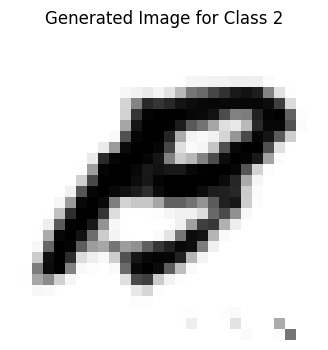

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the model
saved_model_path = "saved_cgan/1737551983"  # Update with the correct path
loaded_model = tf.saved_model.load(saved_model_path)

# Create random latent vector (batch size 1, 100-dimensional)
z_input = np.random.randn(1, 100).astype(np.float32)

# Create class label (batch size 1, single value)
class_label = np.array([[2]], dtype=np.float32)  # Example: Class label for letter 'F'


# Run inference
infer = loaded_model.signatures["serving_default"]
result = infer(
    input_13=tf.convert_to_tensor(z_input), 
    input_12=tf.convert_to_tensor(class_label)
)

# Extract the generated image tensor
generated_image = result["conv2d_12"].numpy()  # Convert tensor to NumPy array

# Reshape the output to match image dimensions (28x28 for EMNIST)
generated_image = generated_image.reshape(28, 28)

# ✅ Display the Image
plt.figure(figsize=(4, 4))
plt.imshow(generated_image, cmap="gray_r")  # Use "gray_r" for handwritten-style images
plt.axis("off")  # Hide axes for better visualization
plt.title(f"Generated Image for Class {int(class_label[0][0])}")
plt.show()


In [9]:
print(class_label)
print(z_input)

[[2.]]
[[-0.66033363 -1.3275741  -0.35811865 -0.80801034  0.4501019  -0.65510964
  -0.9090529  -0.19921175 -1.9407017  -0.21180694  0.21217784 -0.39664844
   1.685146    0.5388565  -0.07038426  0.7694007   1.7989404  -0.42708
   0.02605198 -0.26450664 -0.32074875  0.28994524 -0.38675797 -1.3241186
  -1.5398684  -0.9677521  -0.28883168  0.9710663  -0.25427818  1.0447718
   1.4955736  -0.7118553  -0.5116709  -0.838021   -0.13256523  1.0437117
   0.4804578   0.6979511   0.36426878  0.5110546  -2.0175517  -1.6343114
  -0.32144976 -0.14276648  0.28728494 -1.0352694  -2.0169578  -0.23572254
  -0.32241458 -0.90353477 -0.45628977 -0.01232607 -0.19965123  0.89536756
  -0.71793604 -0.8149965  -0.3399551  -0.6664156  -0.25063232 -0.24196349
   0.5153801   0.337844   -2.089727    1.3190407  -0.5814845   0.7470321
  -1.0690717   1.1345075  -0.59279406 -0.3520374  -0.17612854  0.363146
  -0.5144546  -0.13076268  0.56984174 -1.1900043  -1.9051349  -0.94957125
  -0.08314706 -0.36280987  0.3945529  -1.

In [7]:
print(z_input.shape)
print(class_label.shape)

(1, 100)
(1, 1)
float32
